In [1]:
import numpy as np
import matplotlib.pyplot as pl
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


In [3]:
def compute_cost(X,y,theta):
    m=len(y)
    h=sigmoid(X@theta)
    epsilon=1e-5
    cost=(1/m)*(((-y).T@np.log(h+epsilon))-((1-y).T@np.log(1-h+epsilon))) 

In [4]:
def gradient_descent(X,y,params,learning_rate,iterations):
    m=len(y)
    cost_history=np.zeros((iterations,1))
    for i in range(iterations):
        params=params-(learning_rate/m)*X.T@(sigmoid(X@params)-y)
        cost_history[i]=compute_cost(X,y,params)
    return(cost_history,params)

In [5]:
def predict(X,params):
    return np.round(sigmoid(X@params))

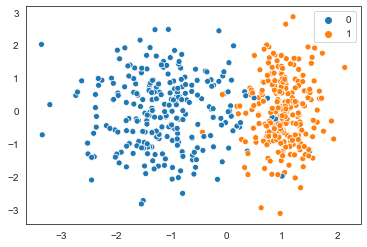

In [6]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

y = y[:,np.newaxis]

sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1));

# ______________________________________________________

In [7]:
from sklearn.datasets import load_iris
iris=load_iris()

In [8]:
X=iris.data
y=iris.target
non_versicolor_labels=[0 for i in range(100)]
versicolor_labels=[1 for i in range(50)]

In [9]:
y=np.concatenate([non_versicolor_labels,versicolor_labels])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
perm=np.random.permutation(150)

In [11]:
X_train,X_test=X[perm][20:],X[perm][:20]
y_train,y_test=y[perm][20:],y[perm][:20]

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((130, 4), (20, 4), (130,), (20,))

In [13]:
versicolor=iris.data[100:,:2].astype(int)
nonversicolor=iris.data[:100,:2].astype(int)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
X_train=X_train[:,2:]
X_test=X_test[:,2:]

In [14]:
X_train

array([[1.4, 0.2],
       [5.5, 1.8],
       [4.5, 1.5],
       [1.7, 0.4],
       [5.1, 2.4],
       [4. , 1.3],
       [5.1, 2.3],
       [5.9, 2.3],
       [4.2, 1.3],
       [1.4, 0.2],
       [5.3, 2.3],
       [1. , 0.2],
       [4.1, 1.3],
       [4.2, 1.5],
       [4.7, 1.4],
       [3.9, 1.1],
       [4.7, 1.5],
       [6. , 1.8],
       [5.2, 2. ],
       [4.4, 1.2],
       [4.5, 1.7],
       [1.5, 0.1],
       [1.5, 0.2],
       [5.6, 2.4],
       [1.6, 0.2],
       [4. , 1. ],
       [5. , 1.9],
       [1.2, 0.2],
       [5. , 1.5],
       [6.3, 1.8],
       [1.9, 0.4],
       [4. , 1.3],
       [4.1, 1.3],
       [1.4, 0.1],
       [4.8, 1.8],
       [1.6, 0.4],
       [6.7, 2. ],
       [6.6, 2.1],
       [5.6, 1.8],
       [1.9, 0.2],
       [5.1, 1.9],
       [4.9, 1.5],
       [5.1, 1.5],
       [4.3, 1.3],
       [1.6, 0.2],
       [1.5, 0.2],
       [4.6, 1.4],
       [1.5, 0.1],
       [5.7, 2.3],
       [5.5, 2.1],
       [1.4, 0.2],
       [5.1, 1.9],
       [5.1,

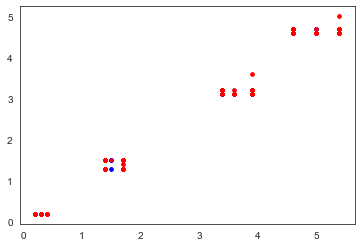

In [15]:
pl.plot(iris.data[versicolor][:,0],iris.data[versicolor][:,1],'b.')
pl.plot(iris.data[nonversicolor][:,0],iris.data[nonversicolor][:,1],'r.')


In [16]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

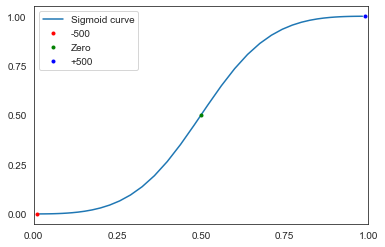

In [17]:
f,axes=pl.subplots(1,1)
pl.plot(sigmoid(np.linspace(-4,4)),sigmoid(np.linspace(-10,10)))
pl.xlim(0,1)
axes.plot(0.01,sigmoid(-500),'r.')
axes.plot(0.5,sigmoid(0),'g.')
axes.plot(0.99,sigmoid(500),'b.')
pl.xticks([0,0.25,0.50,0.75,1])
pl.yticks([0,0.25,0.50,0.75,1])
pl.legend(['Sigmoid curve','-500','Zero','+500'])
pl.show()

In [18]:
# here y is actual and yhat is predicted
def Logistic_loss(y,yhat):
    return -np.mean(y*np.log(yhat)+(1-y)*np.log(1-yhat))

In [19]:
W=np.zeros((2,1))
# or np.zeros([2,1])
b=np.zeros((1,1))
learning_rate=0.01
m=len(y_train)
W,b

(array([[0.],
        [0.]]),
 array([[0.]]))

In [22]:
los=[]
for epoch in range(5000):
    Z=np.matmul(X_train,W)+b
    A=sigmoid(Z)
    loss=Logistic_loss(y_train,A)
    los.append(loss)
    dz=A-y_train
    dw=(1/m)*np.matmul(X_train.T,dz)
    db=np.sum(dz)
    W=W-learning_rate*dw
    b=b-learning_rate*db
#     if epoch%100==0:
#         print(loss)
print(db)


0.07002599316690983


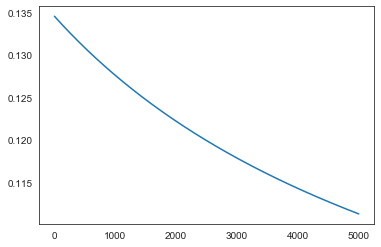

In [23]:
pl.plot(los)

In [24]:
W,b

(array([[3.33877871],
        [2.49390722]]),
 array([[-20.47910704]]))

In [25]:
preds=[]
for i in sigmoid(Z):
    if i>0.5:
        preds.append(1)
    else:
        preds.append(0)

In [26]:
accuracy_score(preds,y_train)

0.9615384615384616

In [27]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [28]:
f1_score(preds,y_train)

0.9438202247191012

In [29]:
accuracy_score(preds,y_train)

0.9615384615384616

In [30]:
Z[:5]

array([[-15.30550502],
       [  2.37312738],
       [ -1.71368444],
       [-13.80514408],
       [  2.53393467]])

In [31]:
preds[:5]

[0, 1, 0, 0, 1]

(-1, 3.5)

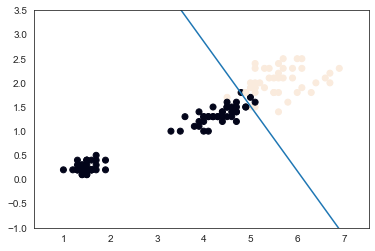

In [32]:
pl.scatter(X_train[:,0],X_train[:,1],c=y_train.ravel())
ax=pl.gca()
xvals=np.array(ax.get_xlim()).reshape(-1,1)
yvals=-(xvals*W[0][0]+b)/W[1][0]
pl.plot(xvals,yvals)
pl.ylim(-1,3.5)

(-1, 3.5)

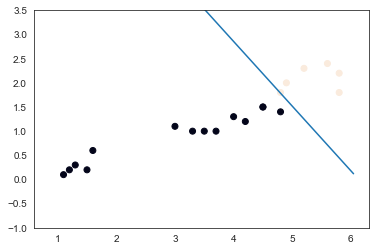

In [33]:
pl.scatter(X_test[:,0],X_test[:,1],c=(y_test.ravel()+50))
ax=pl.gca()
xvals=np.array(ax.get_xlim()).reshape(-1,1)
yvals=-(xvals*W[0][0]+b)/W[1][0]
pl.plot(xvals,yvals,)
pl.ylim(-1,3.5)

In [ ]:
X_train

Logistic Regression From Scratch in Numpy
Stephen Barter
Stephen Barter
Follow
Sep 14, 2018 · 7 min read

Logistic Regression is used for binary classification problems. Unlike it’s cousin Linear Regression which outputs continuous values, Logistic regression outputs probabilities within range 0–1 which represent the liklihood a data point is either A or B, True or False, Pass or Fail, etc. We will take a in depth look at how you can compute your own Logistic Regression model from scratch using Python and Numpy. The recipe for this approach is taken directly from Professor Andrew Ng of Stanford’s online deep learning courses which can be found for free on Youtube. I highly reccomend you watch his video series if you are looking to expand your knowledge of all things machine learning. Let’s go ahead and get to the code. First we will load our libraries and dataset which will be the classic Iris classification problem.

We load Numpy and the Iris dataset from sci-kit learn and then create new labels for our problem which will be is the species Versicolor or not Versicolor. We then make a random permutation for indexing our dataset and create a train /test set.

We then reshape our labels using the reshape function to attain a rank 1 column vector. This will be required in order for python’s broadcasting to compute the correct values once we start calculating our linear algebra. We then pick two features from both train/test set which we will use to classify our labels. For more detail on why I’ve chosen these features please refer to my article Logistic Regression in Sci-kit learn. I’m assuming you have some familiarity with this dataset as any data science enthusiast should. Let’s plot our data points on a scatter plot and visualize our problem.

We can see there is a some overlapping data points but these features do a reasonable job in separating our classes. As previously mentioned, the goal of Logistic Regression is to output values between 0 and 1. How do we convert our continuous values into this range? The answer is by using the Sigmoid function.

As values get larger and larger the sigmoid predicts values closer and closer to 1. As negative values become larger and larger the sigmoid function predicts closer and closer to 0 asymptotically. Given a 0, the sigmoid function outputs 0.5. Now we will discuss the Logistic Regression cost function.


The logistic loss function is well suited for logistic regression because it’s convex. Imagine the loss function as a bowl floating above the data points and the goal is to get to the bottom of the bowl. If the true y value = 0, the left half of the formula cancels out. If the true y value = 1, the right half of the formula cancels. The term y_hat is used for our models prediction of the best value. Therefore we are averaging the loss between our predictions and the true y values. Now how do we minimize our loss function to reach the bottom of the “bowl”? We will achieve this by repeatedly updating our weights/bias via Gradient Descent in order to optimize these values till we have reached the global minimum (bottom of the bowl).

Think of this as a ball rolling down a hill. The first step is initializing your starting point. Then you check your surroundings to decide which is the quickest path downward. This is what is called the gradient in calculus. We will repeatedly take steps down the hill in the path of the greatest descent. These “steps” are called the learning rate in machine learning. If you set your learning rate to high, you may jump over the bottom, if you set it to low, your algorithm will take longer than needed. Finding the appropriate learning rate varies problem to problem but in practice many tend to start with 0.1/0.01. You will need to experiment to find what works best. Now that we have some idea of what’s going on as we perform gradient descent. Let’s see how to implement this in Numpy.
Initialize Weights

W = Weights, b = Bias and learning_rate is how big of “steps” we will take down the slope. Since I will be using 2 feature variables, we make the W matrix of shape 2x1, one for each feature. Bias is a 1x1 matrix as there is only one bias for each example.
2. Write training procedure.

Ok, this will take some detailed explanation. m = len(y_train) will just be used in averaging over the dataset. m = 120 in our case. We create a for loop which will run for 5000 iterations or “epochs”. First, we compute Z which is a linear equation multiplying our training examples times our W matrix then add the bias. Next, we pass this new 1x150 matrix to our sigmoid function which results in a new 1x150 matrix A. We then compute the loss with our logistic loss function. We are now complete our “forward pass”. Now in order to minimize our loss function we must use back propagation which involves some tricky calculus which is beyond the scope of this article. To summarize we will be computing the derivatives of Z, W, and B with respect to our loss function. Think of this like, “If we make a small nudge to Z, how much does this effect the loss function”. So we are effectively finding the slope of each variable which will provide the greatest decrease of the loss function. dz = derivate of Z, dw = derivative of W and db is the derivative of b. Finally comes the gradient descent update. W = W - learning_rate * dw and b = b =b -learning_rate * db are applying small changes to our weights/bias until we finally find that there is no derivative (these are the small “steps” down the hill”). Finally we print out our loss function every 100 steps. We should be able to see a steady decline in values eventually bottoming out. Let’s see what we get. ( I changed this to 3000 epochs to keep it small).

As you can see we have a very quick decline and then it begins to “ roll” slower and slower which means its closer to converging to the global optimum. Next step is checking our predictions. First we inspect our weights/bias values. Then we iterate over each value of sigmoid(Z) and if the value is > 0.5 we assign a 1 for Versicolor and 0 if not.

We use the f1_score which is a combination of precision and recall to find we have a score of .957. Simply using accuracy_score in this case would not be the best idea due to the imbalanced classes. Finally lets plot our results in a scatter plot.

Finally, let’s see how we did on our test set. We just need to use the same weights/bias and compute the sigmoid of the linear formula wX + b.


We were able to correctly classify all of the Versicolor samples in our test set! Though this is not likely to be the case on all future data it’s a good indication that we have created a pretty solid model